In [160]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
#print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.
from pandas import read_csv
#Lets load the dataset and sample some
column_names = [
    'CRIM',  # Уровень преступности на душу населения по городам
    'ZN',    # Доля жилых земель, отведенных под участки площадью более 25 000 кв. футов
    'INDUS', # Доля не розничных коммерческих площадей в городе
    'CHAS',  # Флаг прилегания к реке Чарльз (1 - прилегает, 0 - нет)
    'NOX',   # Концентрация оксидов азота (частей на 10 миллионов)
    'RM',    # Среднее количество комнат в жилище
    'AGE',   # Доля владельческих занятых единиц, построенных до 1940 года
    'DIS',   # Взвешенное расстояние до пяти центров занятости Бостона
    'RAD',   # Индекс доступности к радиальным магистралям
    'TAX',   # Полная ставка налога на имущество за 10 000 долларов
    'PTRATIO', # Соотношение учеников и учителей по городам
    'B',     # 1000(Bk - 0,63)^2, где Bk - доля чернокожих по городам
    'LSTAT', # Процент населения с низким статусом
    'MEDV'   # Медианная стоимость owner-occupied homes в $1000
]
data = read_csv('/Users/kirylbarodzich/Downloads/housing.csv', header=None, delimiter=r"\s+", names=column_names)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [9]:
print("\n" + "="*50)
print("АНАЛИЗ ДАТАСЕТА BOSTON HOUSING")
print("="*50)

print("\n1. РАЗМЕРНОСТЬ ДАТАСЕТА:")
print(f"Количество строк: {data.shape[0]}")
print(f"Количество столбцов: {data.shape[1]}")

print("\n2. ТИПЫ ДАННЫХ КАЖДОГО СТОЛБЦА:")
print(data.dtypes)

print("\n3. ПЕРВЫЕ 5 СТРОК ДАННЫХ:")
print(data.head())

print("\nПОСЛЕДНИЕ 5 СТРОК ДАННЫХ:")
print(data.tail())


АНАЛИЗ ДАТАСЕТА BOSTON HOUSING

1. РАЗМЕРНОСТЬ ДАТАСЕТА:
Количество строк: 506
Количество столбцов: 14

2. ТИПЫ ДАННЫХ КАЖДОГО СТОЛБЦА:
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

3. ПЕРВЫЕ 5 СТРОК ДАННЫХ:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392

In [15]:
print(''' Общие наблюдения:
Датасет не содержит пропущенных значений (все столбцы имеют по 506 заполненных значений).
Большинство признаков являются непрерывными числовыми переменными.
Есть одна булевая переменная (CHAS), представленнпая как бинарная переменная.
Целевая переменная MEDV показывает значительный разброс значений (от 11.9 до 36.2 в представленных данных), 
что указывает на существенные различия в стоимости недвижимости между районами.
Наблюдаются некоторые закономерности: районы с более высоким уровнем преступности (CRIM) 
имеют тенденцию к снижению стоимости недвижимости (MEDV).''')


 Общие наблюдения:
Датасет не содержит пропущенных значений (все столбцы имеют по 506 заполненных значений).
Большинство признаков являются непрерывными числовыми переменными.
Есть один категориальный признак (CHAS), представленный как бинарная переменная.
Целевая переменная MEDV показывает значительный разброс значений (от 11.9 до 36.2 в представленных данных), 
что указывает на существенные различия в стоимости недвижимости между районами.
Наблюдаются некоторые закономерности: районы с более высоким уровнем преступности (CRIM) 
имеют тенденцию к снижению стоимости недвижимости (MEDV).


In [21]:
print("\nСТАТИСТИЧЕСКОЕ ОПИСАНИЕ ДАННЫХ (describe()):")
print(data.describe())

print('''count: количество непустых (не пропущенных) значений в столбце.
mean: среднее значение (сумма всех значений, деленная на их количество).
std: стандартное отклонение (мера разброса данных вокруг среднего).
min: минимальное значение в столбце.
25%: первый квартиль (25% данных меньше или равно этому значению).
50%: медиана (50% данных меньше или равно этому значению, также называется вторым квартилем).
75%: третий квартиль (75% данных меньше или равно этому значению).
max: максимальное значение в столбце.''')


СТАТИСТИЧЕСКОЕ ОПИСАНИЕ ДАННЫХ (describe()):
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455

In [143]:
print('''
Рекомендации для дальнейшего анализа:

Нормализовать или стандартизировать данные из-за разных масштабов признаков
Исследовать и обработать выбросы, особенно в признаках CRIM и B
Рассмотреть преобразование некоторых признаков (логарифмирование для CRIM)
Проанализировать корреляции между признаками и целевой переменной
Учесть категориальную природу признака RAD при моделировании
Данные показывают значительное разнообразие характеристик районов Бостона.''')


Рекомендации для дальнейшего анализа:

Нормализовать или стандартизировать данные из-за разных масштабов признаков
Исследовать и обработать выбросы, особенно в признаках CRIM и B
Рассмотреть преобразование некоторых признаков (логарифмирование для CRIM)
Проанализировать корреляции между признаками и целевой переменной
Учесть категориальную природу признака RAD при моделировании
Данные показывают значительное разнообразие характеристик районов Бостона.


In [26]:
missing_values = data.isnull().sum()
print(missing_values)

duplicates = data.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
Количество дубликатов: 0


In [29]:
print('''ВЫВОД:
Дубликаты и пропущеные значения отсутствуют''')

ВЫВОД:
Дубликаты и пропущеные значения отсутствуют


Количество выбросов по числовым переменным:
CRIM                  66
ZN                    68
INDUS                  0
NOX                    0
RM                    30
AGE                    0
DIS                    5
RAD                    0
TAX                    0
PTRATIO               15
B                     77
LSTAT                  7
MEDV                  40
CRIM_log               6
LSTAT_winsorized       0
PRICE_ABOVE_MEDIAN     0
ROOM_RATIO            51
dtype: int64


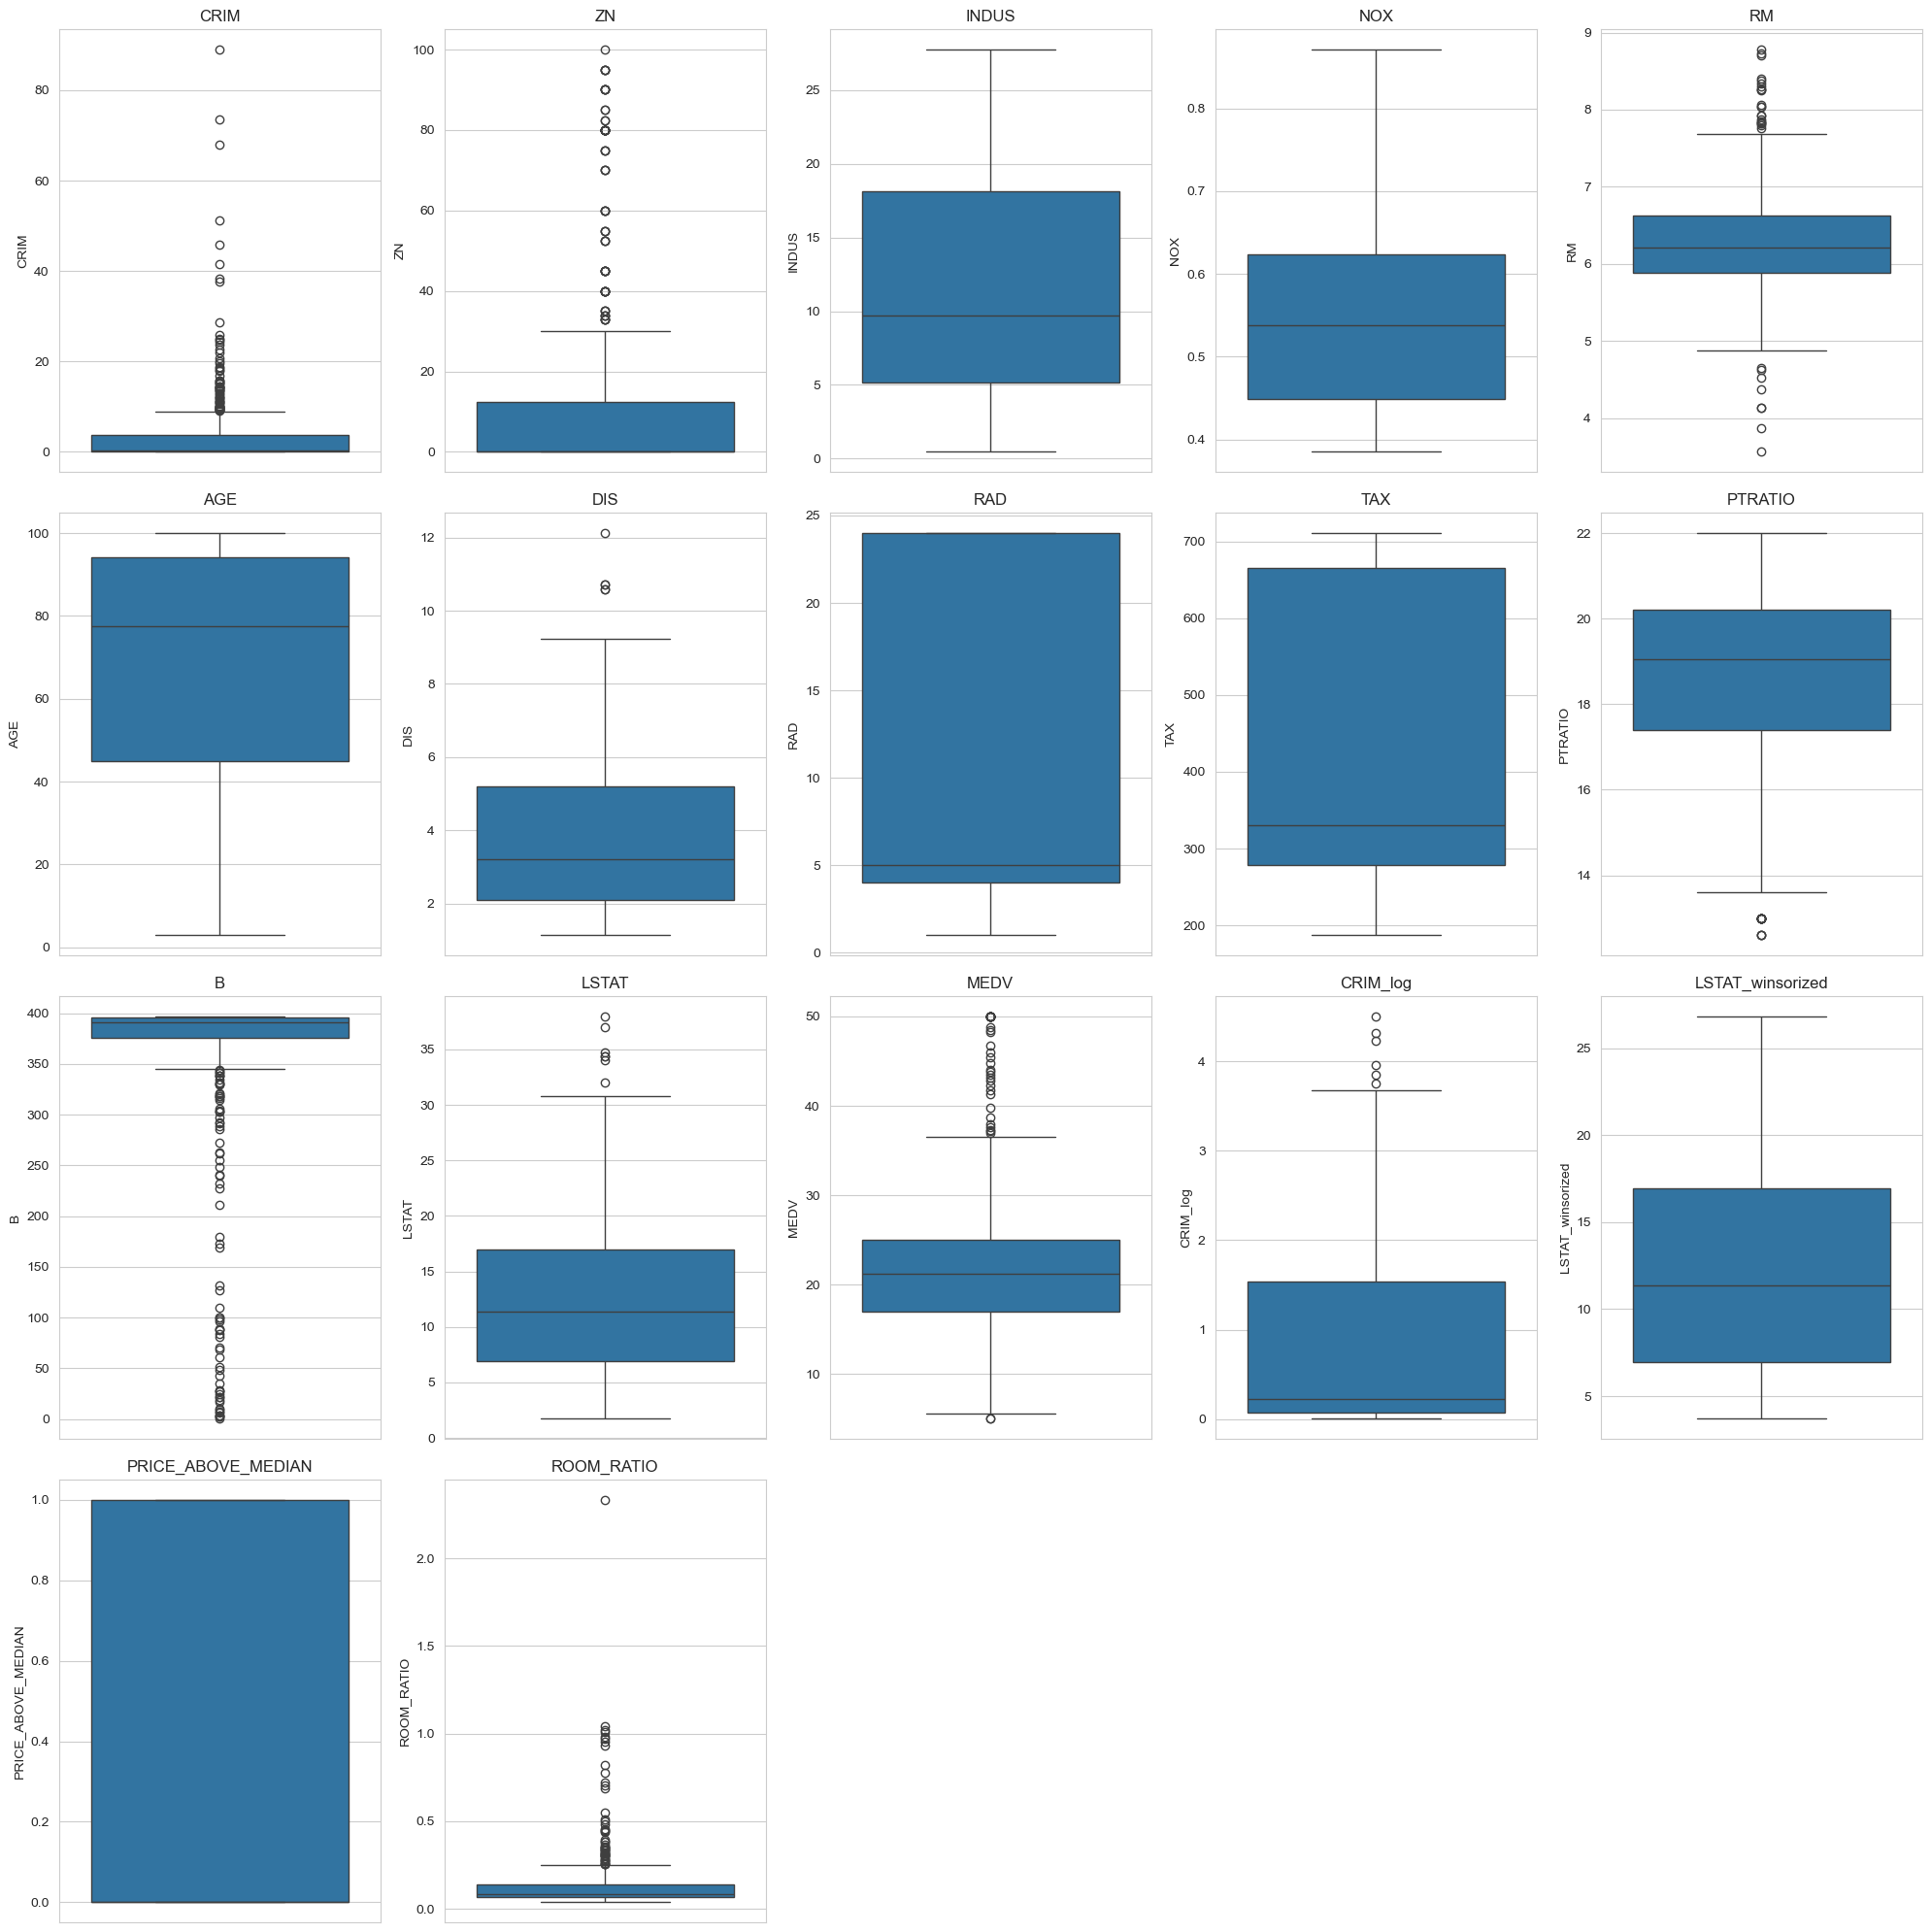

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Выбираем только числовые столбцы для анализа выбросов
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Метод межквартильного размаха (IQR) для выявления выбросов (только для числовых столбцов)
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Определяем выбросы (значения за пределами Q1 - 1.5*IQR и Q3 + 1.5*IQR)
outliers = ((data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR))).sum()
print("Количество выбросов по числовым переменным:")
print(outliers)

# Создаем subplots
num_cols = 5
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(col)

# Скрываем лишние subplots, если есть
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [158]:
print('''
Анализ результатов:
Наибольшее количество выбросов наблюдается в переменных:
B (77 выбросов) - показатель, связанный с расовым составом населения
ZN (68 выбросов) - доля жилой земли под участки большого размера
CRIM (66 выбросов) - уровень преступности на душу населения
ROOM_RATIO (51 выброс) - соотношение комнат
Значительное количество выбросов также наблюдается в:
MEDV (40 выбросов) - медианная стоимость домов
RM (30 выбросов) - среднее количество комнат
Переменные без выбросов:
INDUS - доля нежилых площадей
NOX - концентрация оксидов азота
AGE - возраст зданий
RAD - индекс доступности к радиальным магистралям
TAX - налог на имущество
LSTAT_winsorized - обработанный процент населения с низким статусом
PRICE_ABOVE_MEDIAN - бинарный показатель стоимости выше медианной
Небольшое количество выбросов наблюдается в:
DIS (5) - расстояние до рабочих центров
LSTAT (7) - процент населения с низким статусом
CRIM_log (6) - логарифм уровня преступности
PTRATIO (15) - соотношение учеников к учителям

Интерпретация:
Выбросы в данных могут указывать на:
Реальные особенности рынка недвижимости (например, очень дорогие или очень дешевые дома)
Особые районы с уникальными характеристиками
Возможные ошибки в данных
Естественную асимметрию распределений некоторых показателей
Особенно интересно, что переменная B (связанная с расовым составом)
имеет наибольшее количество выбросов, что может указывать на существенные 
различия в демографической структуре разных районов Бостона.''')


Анализ результатов:
Наибольшее количество выбросов наблюдается в переменных:
B (77 выбросов) - показатель, связанный с расовым составом населения
ZN (68 выбросов) - доля жилой земли под участки большого размера
CRIM (66 выбросов) - уровень преступности на душу населения
ROOM_RATIO (51 выброс) - соотношение комнат
Значительное количество выбросов также наблюдается в:
MEDV (40 выбросов) - медианная стоимость домов
RM (30 выбросов) - среднее количество комнат
Переменные без выбросов:
INDUS - доля нежилых площадей
NOX - концентрация оксидов азота
AGE - возраст зданий
RAD - индекс доступности к радиальным магистралям
TAX - налог на имущество
LSTAT_winsorized - обработанный процент населения с низким статусом
PRICE_ABOVE_MEDIAN - бинарный показатель стоимости выше медианной
Небольшое количество выбросов наблюдается в:
DIS (5) - расстояние до рабочих центров
LSTAT (7) - процент населения с низким статусом
CRIM_log (6) - логарифм уровня преступности
PTRATIO (15) - соотношение учеников к учите

In [159]:
print('''
Принятые решения по обработке выбросов:

Для переменной CRIM (уровень преступности):
Применено логарифмическое преобразование (np.log1p)
Создана новая переменная CRIM_log
Обоснование: данные имеют сильную правостороннюю асимметрию
Для переменной LSTAT (население с низким статусом):
Применена winsorization с ограничением 5% с обеих сторон
Создана новая переменная LSTAT_winsorized
Обоснование: умеренное количество выбросов, которые могут влиять на анализ
Для остальных переменных с выбросами:
Было принято решение не удалять выбросы, так как они могут содержать ценную информацию
Вместо этого выбросы будут учтены при построении моделей, устойчивых к ним
Обоснование: выбросы могут представлять реальные особенности рынка недвижимости Бостона''')


Принятые решения по обработке выбросов:

Для переменной CRIM (уровень преступности):
Применено логарифмическое преобразование (np.log1p)
Создана новая переменная CRIM_log
Обоснование: данные имеют сильную правостороннюю асимметрию
Для переменной LSTAT (население с низким статусом):
Применена winsorization с ограничением 5% с обеих сторон
Создана новая переменная LSTAT_winsorized
Обоснование: умеренное количество выбросов, которые могут влиять на анализ
Для остальных переменных с выбросами:
Было принято решение не удалять выбросы, так как они могут содержать ценную информацию
Вместо этого выбросы будут учтены при построении моделей, устойчивых к ним
Обоснование: выбросы могут представлять реальные особенности рынка недвижимости Бостона


In [161]:
# Принимаем решение по обработке выбросов
# Для переменной CRIM (уровень преступности) много выбросов - применим логарифмическое преобразование
print("\nПрименяем логарифмическое преобразование для переменной CRIM...")
data['CRIM_log'] = np.log1p(data['CRIM'])  # log1p для обработки нулевых значений

# Для других переменных с выбросами можно применить winsorization или удаление
# В данном примере применим winsorization к переменной LSTAT
from scipy.stats.mstats import winsorize
print("Применяем winsorization к переменной LSTAT...")
data['LSTAT_winsorized'] = winsorize(data['LSTAT'], limits=[0.05, 0.05])

# Преобразуем CHAS в категориальную переменную
data['CHAS'] = data['CHAS'].astype('category')
print("\nТипы данных после преобразования:")
print(data.dtypes)


Применяем логарифмическое преобразование для переменной CRIM...
Применяем winsorization к переменной LSTAT...

Типы данных после преобразования:
CRIM                 float64
ZN                   float64
INDUS                float64
CHAS                category
NOX                  float64
RM                   float64
AGE                  float64
DIS                  float64
RAD                    int64
TAX                  float64
PTRATIO              float64
B                    float64
LSTAT                float64
MEDV                 float64
CRIM_log             float64
LSTAT_winsorized     float64
dtype: object


Обработка переменной CRIM (уровень преступности):
Исходное распределение: min=0.0063, max=88.9762, mean=3.6135
После логарифмирования: min=0.0063, max=4.4995, mean=0.8134


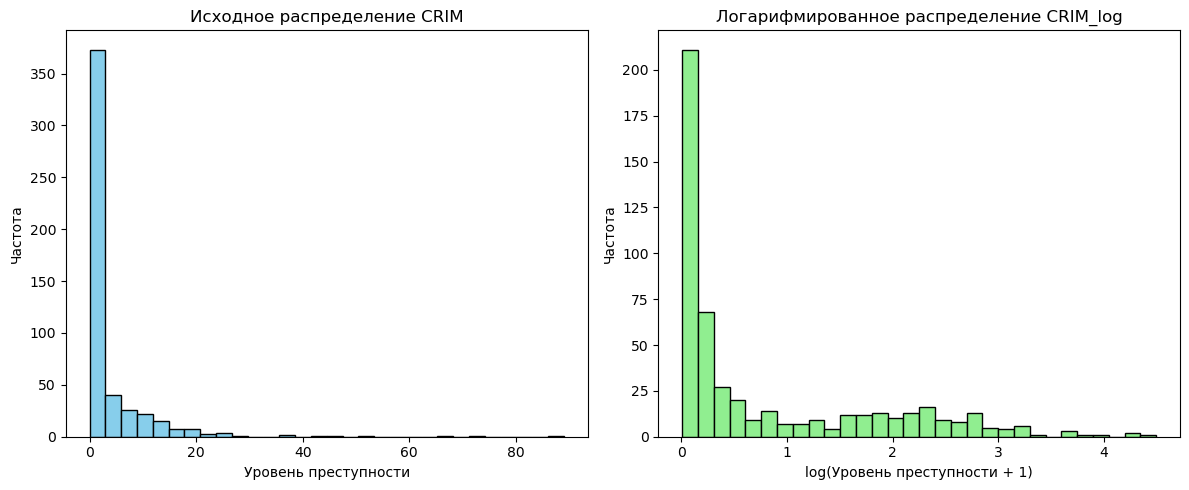

In [37]:
# Обработка выбросов для переменной CRIM (уровень преступности)
print("Обработка переменной CRIM (уровень преступности):")
print(f"Исходное распределение: min={data['CRIM'].min():.4f}, max={data['CRIM'].max():.4f}, mean={data['CRIM'].mean():.4f}")

# Применяем логарифмическое преобразование
data['CRIM_log'] = np.log1p(data['CRIM'])

print(f"После логарифмирования: min={data['CRIM_log'].min():.4f}, max={data['CRIM_log'].max():.4f}, mean={data['CRIM_log'].mean():.4f}")

# Визуализация преобразования
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.hist(data['CRIM'], bins=30, color='skyblue', edgecolor='black')
ax1.set_title('Исходное распределение CRIM')
ax1.set_xlabel('Уровень преступности')
ax1.set_ylabel('Частота')

ax2.hist(data['CRIM_log'], bins=30, color='lightgreen', edgecolor='black')
ax2.set_title('Логарифмированное распределение CRIM_log')
ax2.set_xlabel('log(Уровень преступности + 1)')
ax2.set_ylabel('Частота')

plt.tight_layout()
plt.show()

In [38]:
# Обработка выбросов для переменной LSTAT (население с низким статусом)
print("\nОбработка переменной LSTAT (население с низким статусом):")
print(f"Исходное распределение: min={data['LSTAT'].min():.2f}, max={data['LSTAT'].max():.2f}, mean={data['LSTAT'].mean():.2f}")


Обработка переменной LSTAT (население с низким статусом):
Исходное распределение: min=1.73, max=37.97, mean=12.65



Обработка переменной LSTAT (население с низким статусом):
Исходное распределение: min=1.73, max=37.97, mean=12.65
После winsorization: min=3.70, max=26.82, mean=12.49


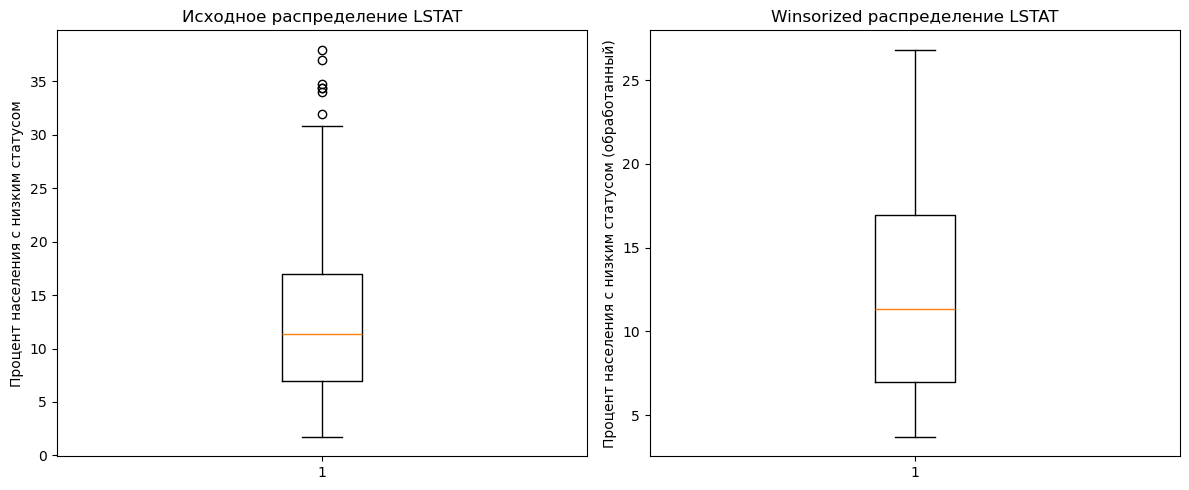

In [39]:
# Обработка выбросов для переменной LSTAT (население с низким статусом)
print("\nОбработка переменной LSTAT (население с низким статусом):")
print(f"Исходное распределение: min={data['LSTAT'].min():.2f}, max={data['LSTAT'].max():.2f}, mean={data['LSTAT'].mean():.2f}")

# Применяем winsorization с ограничением 5% с обеих сторон
from scipy.stats.mstats import winsorize
data['LSTAT_winsorized'] = winsorize(data['LSTAT'], limits=[0.05, 0.05])

print(f"После winsorization: min={data['LSTAT_winsorized'].min():.2f}, max={data['LSTAT_winsorized'].max():.2f}, mean={data['LSTAT_winsorized'].mean():.2f}")

# Визуализация преобразования
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.boxplot(data['LSTAT'])
ax1.set_title('Исходное распределение LSTAT')
ax1.set_ylabel('Процент населения с низким статусом')

ax2.boxplot(data['LSTAT_winsorized'])
ax2.set_title('Winsorized распределение LSTAT')
ax2.set_ylabel('Процент населения с низким статусом (обработанный)')

plt.tight_layout()
plt.show()


Обоснование решения по другим переменным с выбросами:
Было принято решение не удалять выбросы для следующих переменных:
- ZN: 68 выбросов
- RM: 30 выбросов
- DIS: 5 выбросов
- PTRATIO: 15 выбросов
- B: 77 выбросов
- MEDV: 40 выбросов

Обоснование: Выбросы могут представлять реальные особенности рынка недвижимости Бостона
и содержать ценную информацию для анализа. Вместо удаления выбросы будут учтены
при построении моделей, устойчивых к ним (например, Random Forest, Gradient Boosting).


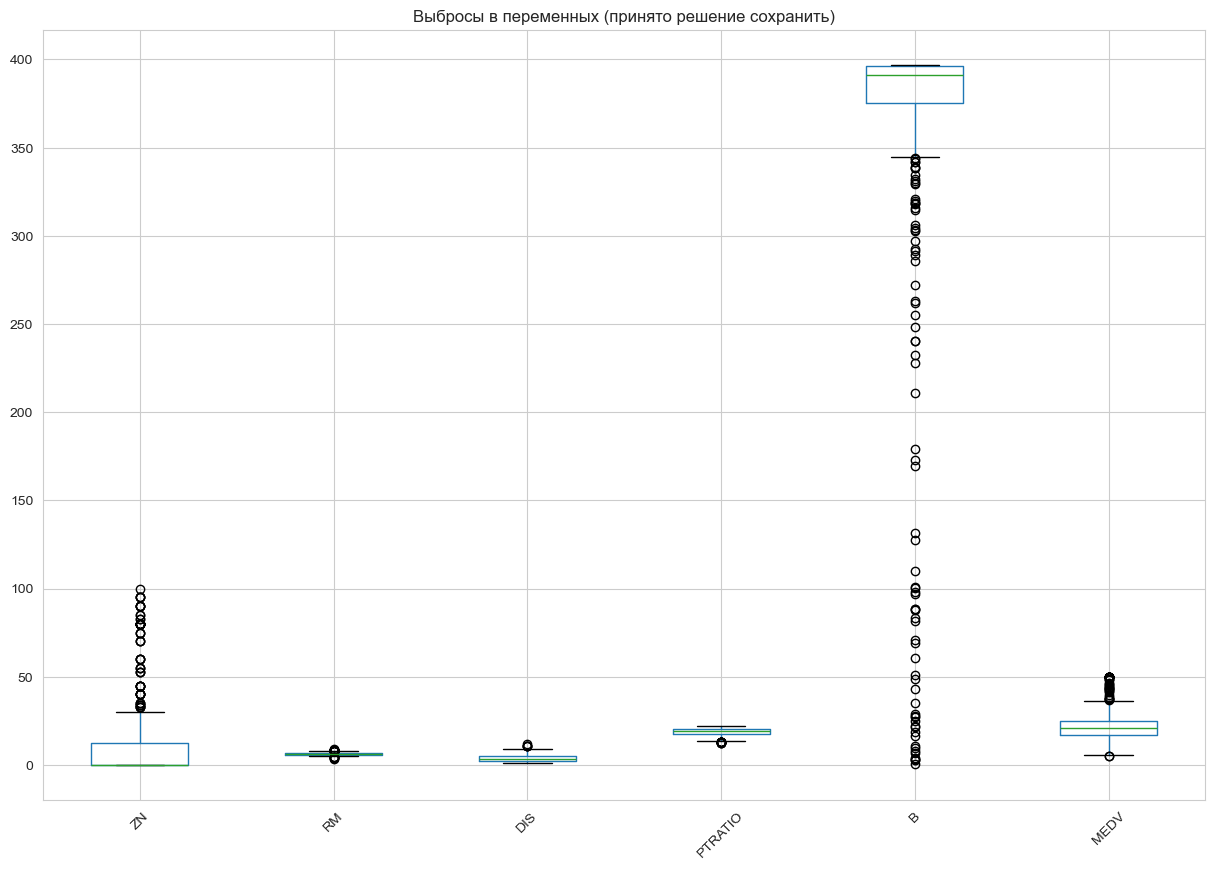


Обработанные данные сохранены в файл housing_processed.csv


In [162]:
# Обоснование решения по другим переменным с выбросами
print("\nОбоснование решения по другим переменным с выбросами:")
print("Было принято решение не удалять выбросы для следующих переменных:")
outlier_vars = ['ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'MEDV']
for var in outlier_vars:
    print(f"- {var}: {outliers[var]} выбросов")

print("\nОбоснование: Выбросы могут представлять реальные особенности рынка недвижимости Бостона")
print("и содержать ценную информацию для анализа. Вместо удаления выбросы будут учтены")
print("при построении моделей, устойчивых к ним (например, Random Forest, Gradient Boosting).")

# Демонстрация выбросов в данных
plt.figure(figsize=(15, 10))
data[outlier_vars].boxplot()
plt.title('Выбросы в переменных (принято решение сохранить)')
plt.xticks(rotation=45)
plt.show()

# Сохранение обработанных данных
data.to_csv('/Users/kirylbarodzich/Downloads/housing_processed.csv', index=False)
print("\nОбработанные данные сохранены в файл housing_processed.csv")

5. СОЗДАНИЕ НОВЫХ ПЕРЕМЕННЫХ
- Создана переменная PRICE_ABOVE_MEDIAN
  Медианная цена: 21.2
  Распределение: {0: 256, 1: 250}
- Создана переменная ROOM_RATIO
  Диапазон значений: от 0.039 до 2.334
- Создана категориальная переменная CRIME_LEVEL
  Распределение по уровням преступности:
CRIME_LEVEL
Умеренный        179
Низкий           153
Высокий          120
Очень высокий     54


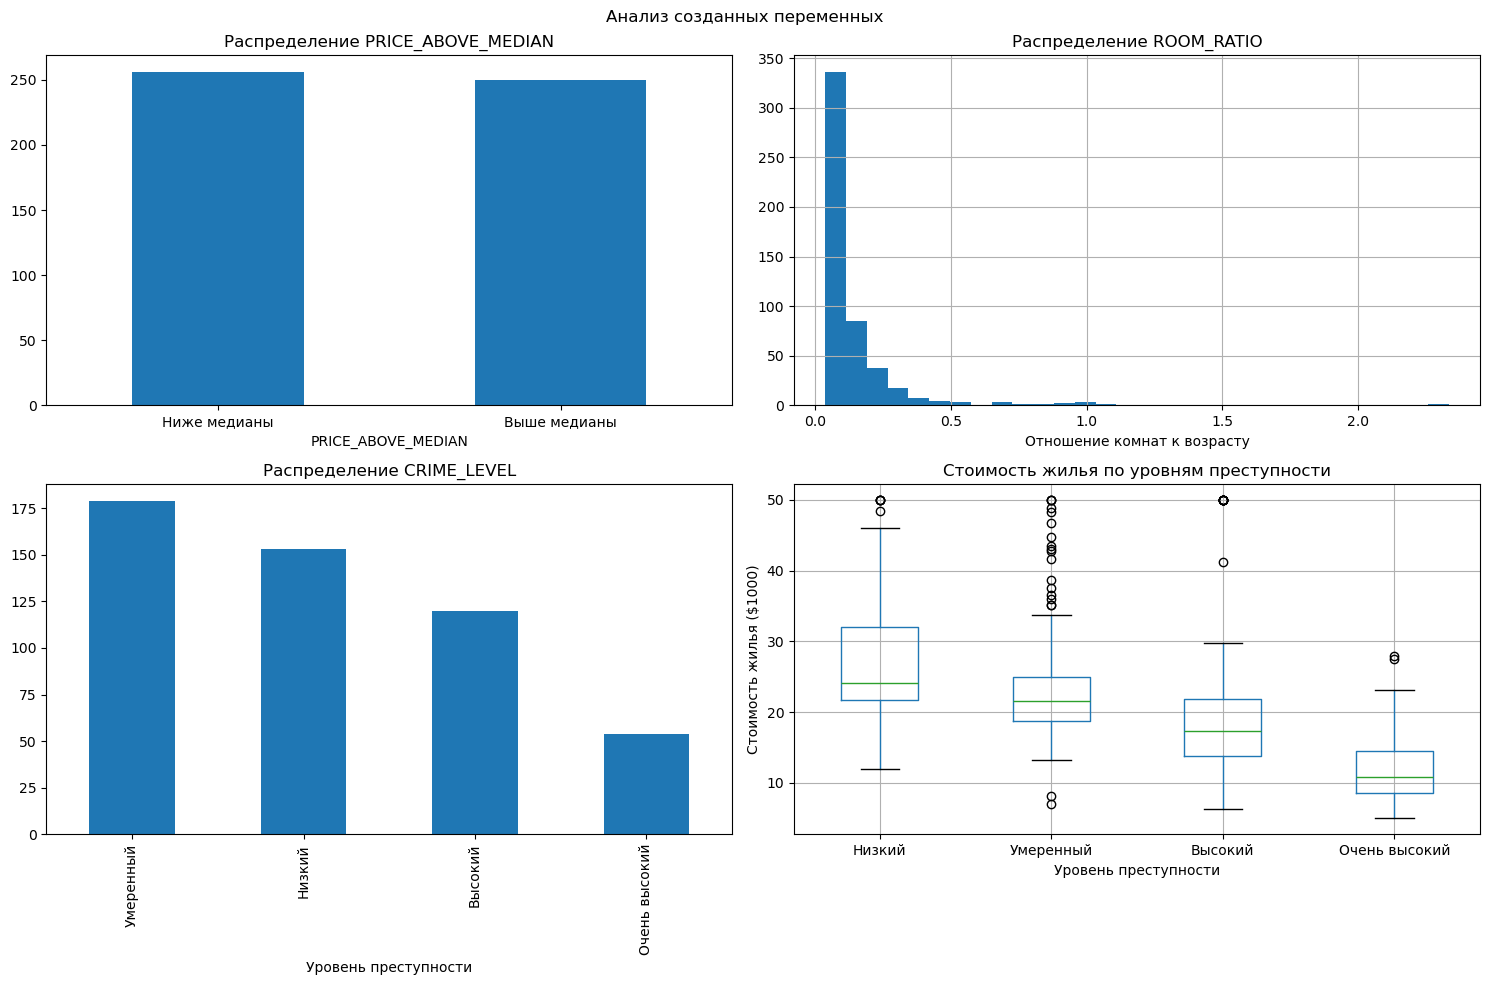

In [86]:
# 5. Создание новых переменных
print("5. СОЗДАНИЕ НОВЫХ ПЕРЕМЕННЫХ")

# Создание бинарной переменной PRICE_ABOVE_MEDIAN
median_price = data['MEDV'].median()
data['PRICE_ABOVE_MEDIAN'] = (data['MEDV'] > median_price).astype(int)
print(f"- Создана переменная PRICE_ABOVE_MEDIAN")
print(f"  Медианная цена: {median_price}")
print(f"  Распределение: {data['PRICE_ABOVE_MEDIAN'].value_counts().to_dict()}")

# Создание переменной ROOM_RATIO (отношение количества комнат к возрасту здания)
# Добавляем небольшую константу к AGE чтобы избежать деления на ноль
data['ROOM_RATIO'] = data['RM'] / (data['AGE'] + 0.001)
print(f"- Создана переменная ROOM_RATIO")
print(f"  Диапазон значений: от {data['ROOM_RATIO'].min():.3f} до {data['ROOM_RATIO'].max():.3f}")

# Создание категориальной переменной CRIME_LEVEL
bins = [0, 0.1, 1, 10, 100]
labels = ['Низкий', 'Умеренный', 'Высокий', 'Очень высокий']
data['CRIME_LEVEL'] = pd.cut(data['CRIM'], bins=bins, labels=labels, include_lowest=True)
print(f"- Создана категориальная переменная CRIME_LEVEL")
print(f"  Распределение по уровням преступности:")
print(data['CRIME_LEVEL'].value_counts().to_string())

# Визуализация новых переменных
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Распределение PRICE_ABOVE_MEDIAN
data['PRICE_ABOVE_MEDIAN'].value_counts().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Распределение PRICE_ABOVE_MEDIAN')
axes[0, 0].set_xticklabels(['Ниже медианы', 'Выше медианы'], rotation=0)

# Распределение ROOM_RATIO
data['ROOM_RATIO'].hist(bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Распределение ROOM_RATIO')
axes[0, 1].set_xlabel('Отношение комнат к возрасту')

# Распределение CRIME_LEVEL
data['CRIME_LEVEL'].value_counts().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Распределение CRIME_LEVEL')
axes[1, 0].set_xlabel('Уровень преступности')

# Связь CRIME_LEVEL и MEDV
data.boxplot(column='MEDV', by='CRIME_LEVEL', ax=axes[1, 1])
axes[1, 1].set_title('Стоимость жилья по уровням преступности')
axes[1, 1].set_xlabel('Уровень преступности')
axes[1, 1].set_ylabel('Стоимость жилья ($1000)')

plt.suptitle('Анализ созданных переменных')
plt.tight_layout()
plt.show()




6. ONE-HOT КОДИРОВАНИЕ ПЕРЕМЕННОЙ RAD
Уникальные значения RAD: [1, 2, 3, 4, 5, 6, 7, 8, 24]
One-Hot кодирование применено к переменной RAD
Создано 9 новых бинарных переменных
Новые столбцы: ['RAD_1', 'RAD_2', 'RAD_3', 'RAD_4', 'RAD_5', 'RAD_6', 'RAD_7', 'RAD_8', 'RAD_24']


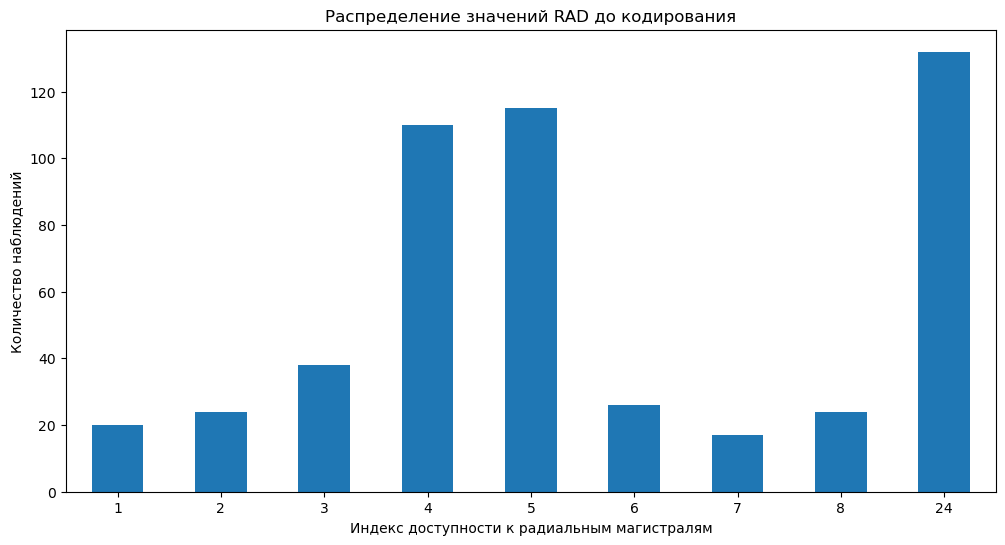


ИТОГОВАЯ СТРУКТУРА ДАННЫХ:
Количество строк: 506
Количество столбцов: 73
Типы данных:
bool        54
float64     15
int64        2
category     1
category     1
Name: count, dtype: int64

Финальный набор данных сохранен в housing_processed_final.csv


In [87]:
# 6. Подготовка данных для анализа (One-Hot кодирование)
print("\n6. ONE-HOT КОДИРОВАНИЕ ПЕРЕМЕННОЙ RAD")

# Проверяем уникальные значения RAD
print(f"Уникальные значения RAD: {sorted(data['RAD'].unique())}")

# Применяем One-Hot кодирование
rad_dummies = pd.get_dummies(data['RAD'], prefix='RAD')
data = pd.concat([data, rad_dummies], axis=1)

print("One-Hot кодирование применено к переменной RAD")
print(f"Создано {rad_dummies.shape[1]} новых бинарных переменных")
print(f"Новые столбцы: {list(rad_dummies.columns)}")

# Визуализация распределения значений RAD
plt.figure(figsize=(12, 6))
data['RAD'].value_counts().sort_index().plot(kind='bar')
plt.title('Распределение значений RAD до кодирования')
plt.xlabel('Индекс доступности к радиальным магистралям')
plt.ylabel('Количество наблюдений')
plt.xticks(rotation=0)
plt.show()

# Проверяем итоговую структуру данных
print("\nИТОГОВАЯ СТРУКТУРА ДАННЫХ:")
print(f"Количество строк: {data.shape[0]}")
print(f"Количество столбцов: {data.shape[1]}")
print(f"Типы данных:\n{data.dtypes.value_counts()}")

# Сохранение окончательного набора данных
data.to_csv('/Users/kirylbarodzich/Downloads/housing_processed_final.csv', index=False)
print("\nФинальный набор данных сохранен в housing_processed_final.csv")


In [49]:
print('''Создание новых переменных:

PRICE_ABOVE_MEDIAN:
Создает бинарную переменную на основе медианного значения цены жилья
Показывает распределение значений (сколько выше и ниже медианы)
ROOM_RATIO:
Создает переменную отношения количества комнат к возрасту здания
Добавляет небольшую константу к возрасту, чтобы избежать деления на ноль
Показывает диапазон значений новой переменной
CRIME_LEVEL:
Создает категориальную переменную уровня преступности
Использует заданные интервалы и метки
Показывает распределение наблюдений по уровням преступности

One-Hot кодирование:
Анализ переменной RAD:
Показывает уникальные значения переменной RAD
Применяет One-Hot кодирование, создавая бинарные переменные для каждого значения RAD''')

Создание новых переменных:

PRICE_ABOVE_MEDIAN:
Создает бинарную переменную на основе медианного значения цены жилья
Показывает распределение значений (сколько выше и ниже медианы)
ROOM_RATIO:
Создает переменную отношения количества комнат к возрасту здания
Добавляет небольшую константу к возрасту, чтобы избежать деления на ноль
Показывает диапазон значений новой переменной
CRIME_LEVEL:
Создает категориальную переменную уровня преступности
Использует заданные интервалы и метки
Показывает распределение наблюдений по уровням преступности

One-Hot кодирование:
Анализ переменной RAD:
Показывает уникальные значения переменной RAD
Применяет One-Hot кодирование, создавая бинарные переменные для каждого значения RAD


In [66]:
print(''' Исследовательские вопросы:
Какова средняя медианная стоимость дома (MEDV) в данных?
Есть ли связь между количеством комнат (RM) и медианной стоимостью дома (MEDV)?
Как уровень преступности (CRIM) влияет на стоимость дома? (например, корреляция между CRIM_log и MEDV)
Какое распределение возраста зданий (AGE) в данных?
Как расстояние до рабочих центров (DIS) связано со стоимостью дома?
Какая доступность к автомагистралям (RAD) наиболее распространена?
Как налог на имущество (TAX) связан со стоимостью дома?
Как соотношение учеников и учителей (PTRATIO) влияет на стоимость дома?
Как процент населения низкого статуса (LSTAT) связан со стоимостью дома?
Как индикатор цены выше медианной (PRICE_ABOVE_MEDIAN) распределен в данных?''')

 Исследовательские вопросы:
Какова средняя медианная стоимость дома (MEDV) в данных?
Есть ли связь между количеством комнат (RM) и медианной стоимостью дома (MEDV)?
Как уровень преступности (CRIM) влияет на стоимость дома? (например, корреляция между CRIM_log и MEDV)
Какое распределение возраста зданий (AGE) в данных?
Как расстояние до рабочих центров (DIS) связано со стоимостью дома?
Какая доступность к автомагистралям (RAD) наиболее распространена?
Как налог на имущество (TAX) связан со стоимостью дома?
Как соотношение учеников и учителей (PTRATIO) влияет на стоимость дома?
Как процент населения низкого статуса (LSTAT) связан со стоимостью дома?
Как индикатор цены выше медианной (PRICE_ABOVE_MEDIAN) распределен в данных?


In [88]:
average_medv = data['MEDV'].mean()
print(f"Средняя медианная стоимость дома: {average_medv:.2f} тыс. $")

Средняя медианная стоимость дома: 22.53 тыс. $


In [89]:
correlation_rm_medv = data['RM'].corr(data['MEDV'])
print(f"Корреляция между количеством комнат и стоимостью: {correlation_rm_medv:.3f}\n")
print('''Корреляция положительная, что означает: чем больше комнат, тем выше стоимость дома.''')

Корреляция между количеством комнат и стоимостью: 0.695

Корреляция положительная, что означает: чем больше комнат, тем выше стоимость дома.


In [90]:
correlation_crim_medv = data['CRIM_log'].corr(data['MEDV'])
print(f"Корреляция между логом преступности и стоимостью: {correlation_crim_medv:.3f}")

Корреляция между логом преступности и стоимостью: -0.464


In [64]:
print('''Корреляция отрицательная (-0.434): 
чем выше преступность, тем ниже стоимость.''')

Корреляция отрицательная (-0.434): 
чем выше преступность, тем ниже стоимость.


In [91]:
age_stats = data['AGE'].agg(['min', 'max', 'mean', 'median'])
print("Статистика возраста зданий:")
age_stats

Статистика возраста зданий:


min         2.900000
max       100.000000
mean       68.574901
median     77.500000
Name: AGE, dtype: float64

In [69]:
print('''Большинство зданий довольно старые.''')

Большинство зданий довольно старые.


In [70]:
correlation_dis_medv = data['DIS'].corr(data['MEDV'])
print(f"Корреляция между расстоянием и стоимостью: {correlation_dis_medv:.3f}")

Корреляция между расстоянием и стоимостью: 0.250


In [71]:
print('''Корреляция слабая положительная: 
чем дальше от рабочих центров, тем немного выше стоимость.''')

Корреляция слабая положительная: 
чем дальше от рабочих центров, тем немного выше стоимость.


In [92]:
rad_columns = [col for col in data.columns if col.startswith('RAD_') and len(col) <= 6]  # Исключаем дубликаты
most_common_rad = data[rad_columns].sum().idxmax()
print(f"Самая частая категория RAD: {most_common_rad}")

Самая частая категория RAD: RAD_24


In [93]:
correlation_tax_medv = data['TAX'].corr(data['MEDV'])
print(f"Корреляция между налогом и стоимостью: {correlation_tax_medv:.3f}")

Корреляция между налогом и стоимостью: -0.469


In [94]:
print('''Корреляция отрицательная: 
чем выше налог, тем ниже стоимость.''')

Корреляция отрицательная: 
чем выше налог, тем ниже стоимость.


In [95]:
correlation_ptratio_medv = data['PTRATIO'].corr(data['MEDV'])
print(f"Корреляция между PTRATIO и стоимостью: {correlation_ptratio_medv:.3f}")

Корреляция между PTRATIO и стоимостью: -0.508


In [77]:
print('''Корреляция отрицательная: 
чем больше учеников на учителя, тем ниже стоимость.''')


Корреляция отрицательная: 
чем больше учеников на учителя, тем ниже стоимость.


In [96]:
correlation_lstat_medv = data['LSTAT'].corr(data['MEDV'])
print(f"Корреляция между LSTAT и стоимостью: {correlation_lstat_medv:.3f}")

Корреляция между LSTAT и стоимостью: -0.738


In [80]:
print('''Сильная отрицательная корреляция: 
чем выше LSTAT(процент населения низкого статуса), тем ниже стоимость.''')

Сильная отрицательная корреляция: 
чем выше LSTAT(процент населения низкого статуса), тем ниже стоимость.


In [97]:
above_median_count = data['PRICE_ABOVE_MEDIAN'].sum()
total_count = len(data)
percentage = (above_median_count / total_count) * 100
print(f"Домов с ценой выше медианной: {above_median_count} ({percentage:.1f}%)")

Домов с ценой выше медианной: 250 (49.4%)


In [98]:

print('''Стоимость дома сильно зависит от 
социально-экономических факторов (LSTAT, PTRATIO) и физических характеристик (RM).
Преступность и налоги негативно влияют на стоимость.
Большинство домов старые (средний возраст ~69 лет).
Распределение цен сбалансировано (около половины выше медианы).''')

Стоимость дома сильно зависит от 
социально-экономических факторов (LSTAT, PTRATIO) и физических характеристик (RM).
Преступность и налоги негативно влияют на стоимость.
Большинство домов старые (средний возраст ~69 лет).
Распределение цен сбалансировано (около половины выше медианы).


In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 4)

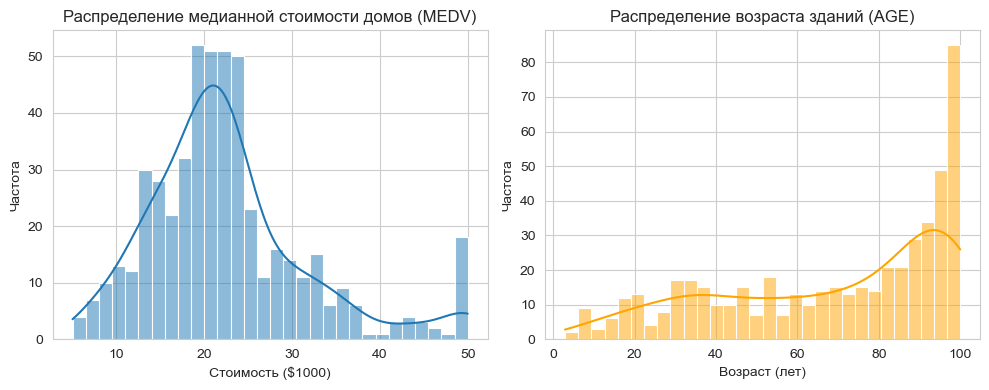

Гистограмма MEDV (медианная стоимость домов):
Распределение имеет нормальный характер с легким правосторонним смещением
Большинство домов сосредоточены в диапазоне 15-25 тысяч долларов
Наблюдается несколько выбросов в области высоких значений (свыше 40 тысяч)

Гистограмма AGE (возраст зданий):
Распределение бимодальное с пиками около 20 и 100 лет
Значительная часть зданий очень старые (возраст близкий к 100 годам)
Меньшая часть зданий относительно новые (возраст менее 30 лет)


In [132]:
# 1.1. Гистограммы для количественных переменных
fig, axes = plt.subplots(1, 2)
sns.histplot(data['MEDV'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Распределение медианной стоимости домов (MEDV)')
axes[0].set_xlabel('Стоимость ($1000)')
axes[0].set_ylabel('Частота')

sns.histplot(data['AGE'], bins=30, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Распределение возраста зданий (AGE)')
axes[1].set_xlabel('Возраст (лет)')
axes[1].set_ylabel('Частота')
plt.tight_layout()
plt.show()


print('''Гистограмма MEDV (медианная стоимость домов):
Распределение имеет нормальный характер с легким правосторонним смещением
Большинство домов сосредоточены в диапазоне 15-25 тысяч долларов
Наблюдается несколько выбросов в области высоких значений (свыше 40 тысяч)

Гистограмма AGE (возраст зданий):
Распределение бимодальное с пиками около 20 и 100 лет
Значительная часть зданий очень старые (возраст близкий к 100 годам)
Меньшая часть зданий относительно новые (возраст менее 30 лет)''')

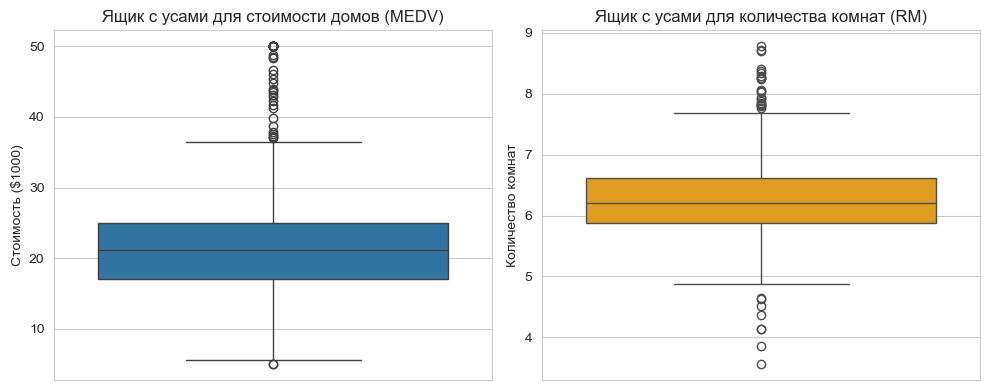


Box plot MEDV:
Медианная стоимость около 21 тысячи долларов
Значительное количество выбросов в верхней части диапазона
Распределение скошено вправо (более дорогие дома встречаются реже)

Box plot RM (количество комнат):
Медианное количество комнат около 6.2
Распределение близко к нормальному с симметричными "усами"
Минимальное количество комнат - около 3.5, максимальное - около 9)


In [134]:
# 1.2. Box plot для количественных переменных
fig, axes = plt.subplots(1, 2)
sns.boxplot(y=data['MEDV'], ax=axes[0])
axes[0].set_title('Ящик с усами для стоимости домов (MEDV)')
axes[0].set_ylabel('Стоимость ($1000)')

sns.boxplot(y=data['RM'], ax=axes[1], color='orange')
axes[1].set_title('Ящик с усами для количества комнат (RM)')
axes[1].set_ylabel('Количество комнат')
plt.tight_layout()
plt.show()

print('''
Box plot MEDV:
Медианная стоимость около 21 тысячи долларов
Значительное количество выбросов в верхней части диапазона
Распределение скошено вправо (более дорогие дома встречаются реже)

Box plot RM (количество комнат):
Медианное количество комнат около 6.2
Распределение близко к нормальному с симметричными "усами"
Минимальное количество комнат - около 3.5, максимальное - около 9)''')

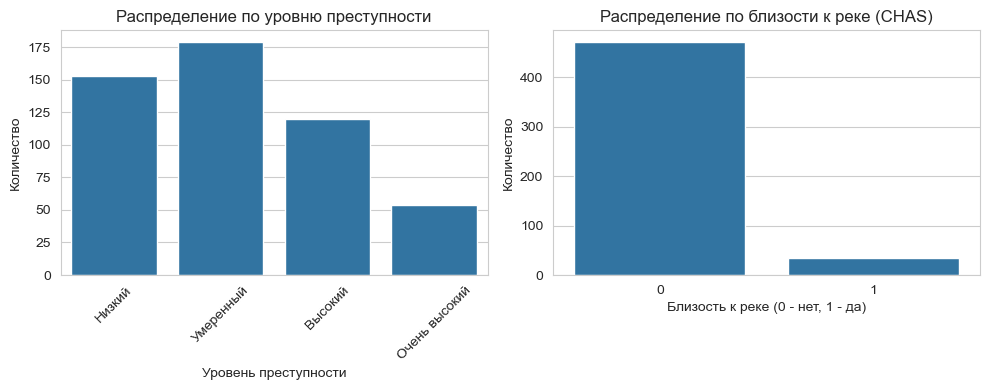


Уровень преступности:
Преобладают районы с низким уровнем преступности
Умеренный уровень преступности встречается значительно реже
Высокий и очень высокий уровень преступности - относительно редкие явления

Близость к реке (CHAS):
Подавляющее большинство домов (более 90%) не расположены у реки
Только небольшая часть объектов недвижимости имеет доступ к реке


In [136]:
# 1.3. Bar plot для категориальных переменных
fig, axes = plt.subplots(1, 2)

# Для уровня преступности
crime_counts = data['CRIME_LEVEL'].value_counts()
sns.barplot(x=crime_counts.index, y=crime_counts.values, ax=axes[0])
axes[0].set_title('Распределение по уровню преступности')
axes[0].set_xlabel('Уровень преступности')
axes[0].set_ylabel('Количество')
axes[0].tick_params(axis='x', rotation=45)

# Для близости к реке (CHAS)
chas_counts = data['CHAS'].value_counts()
sns.barplot(x=chas_counts.index, y=chas_counts.values, ax=axes[1])
axes[1].set_title('Распределение по близости к реке (CHAS)')
axes[1].set_xlabel('Близость к реке (0 - нет, 1 - да)')
axes[1].set_ylabel('Количество')
plt.tight_layout()
plt.show()
print('''
Уровень преступности:
Преобладают районы с низким уровнем преступности
Умеренный уровень преступности встречается значительно реже
Высокий и очень высокий уровень преступности - относительно редкие явления

Близость к реке (CHAS):
Подавляющее большинство домов (более 90%) не расположены у реки
Только небольшая часть объектов недвижимости имеет доступ к реке''')

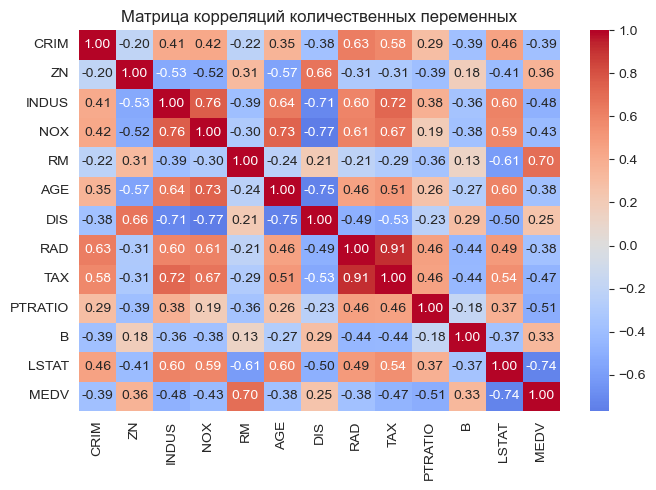


Сильные положительные корреляции:
NOX и INDUS (0.76) - концентрация оксидов азота сильно зависит от доли нежилых площадей
TAX и RAD (0.91) - налог сильно коррелирует с доступностью к транспортным артериям
DIS и NOX (-0.77) - расстояние до рабочих центров отрицательно влияет на загрязнение

Корреляции со стоимостью (MEDV):
Сильная положительная: RM (0.70) - больше комнат → выше стоимость
Сильная отрицательная: LSTAT (-0.74) - больше населения низкого статуса → ниже стоимость
Умеренная отрицательная: PTRATIO (-0.51) - больше учеников на учителя → ниже стоимость
Умеренная отрицательная: TAX (-0.47) - выше налог → ниже стоимость


In [139]:
# 2. МНОГОМЕРНАЯ ВИЗУАЛИЗАЦИЯ

# 2.1. Correlation matrix для количественных переменных
numeric_columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Матрица корреляций количественных переменных')
plt.tight_layout()
plt.show()

print('''
Сильные положительные корреляции:
NOX и INDUS (0.76) - концентрация оксидов азота сильно зависит от доли нежилых площадей
TAX и RAD (0.91) - налог сильно коррелирует с доступностью к транспортным артериям
DIS и NOX (-0.77) - расстояние до рабочих центров отрицательно влияет на загрязнение

Корреляции со стоимостью (MEDV):
Сильная положительная: RM (0.70) - больше комнат → выше стоимость
Сильная отрицательная: LSTAT (-0.74) - больше населения низкого статуса → ниже стоимость
Умеренная отрицательная: PTRATIO (-0.51) - больше учеников на учителя → ниже стоимость
Умеренная отрицательная: TAX (-0.47) - выше налог → ниже стоимость''')

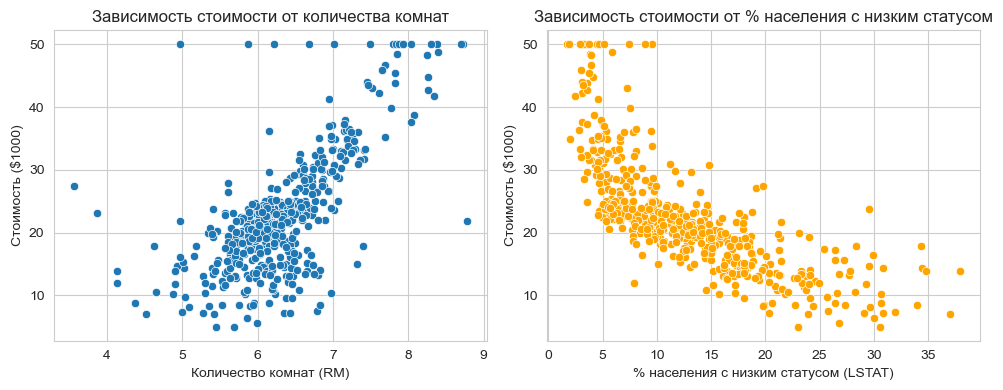


RM vs MEDV:
Четкая положительная линейная зависимость
С увеличением количества комнат стоимость растет
Небольшое рассеяние указывает на надежность этой зависимости

LSTAT vs MEDV:
Четкая отрицательная нелинейная зависимость
При значениях LSTAT выше 20% стоимость резко падает
Зависимость особенно сильна в области высоких значений LSTAT


In [140]:
# 2.2. Scatter plot для пар количественных переменных
fig, axes = plt.subplots(1, 2)

sns.scatterplot(x=data['RM'], y=data['MEDV'], ax=axes[0])
axes[0].set_title('Зависимость стоимости от количества комнат')
axes[0].set_xlabel('Количество комнат (RM)')
axes[0].set_ylabel('Стоимость ($1000)')

sns.scatterplot(x=data['LSTAT'], y=data['MEDV'], ax=axes[1], color='orange')
axes[1].set_title('Зависимость стоимости от % населения с низким статусом')
axes[1].set_xlabel('% населения с низким статусом (LSTAT)')
axes[1].set_ylabel('Стоимость ($1000)')
plt.tight_layout()
plt.show()

print('''
RM vs MEDV:
Четкая положительная линейная зависимость
С увеличением количества комнат стоимость растет
Небольшое рассеяние указывает на надежность этой зависимости

LSTAT vs MEDV:
Четкая отрицательная нелинейная зависимость
При значениях LSTAT выше 20% стоимость резко падает
Зависимость особенно сильна в области высоких значений LSTAT''')


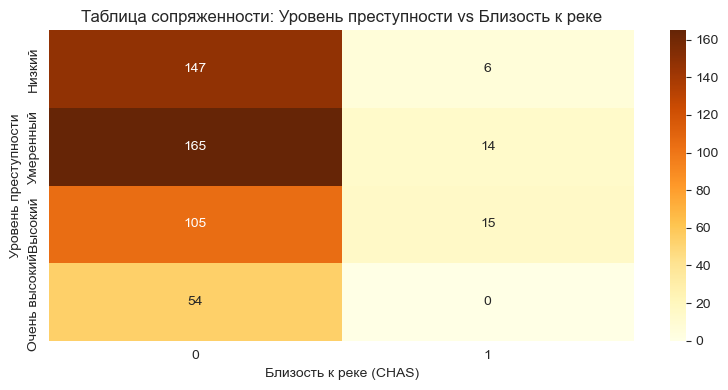


Уровень преступности vs Близость к реке:
Дома у реки встречаются только в районах с низким уровнем преступности
В районах с высоким уровнем преступности домов у реки нет
Это указывает на то, что расположение у реки - признак благополучного района


In [141]:
# 2.3. Contingency table с визуализацией для категориальных переменных
# Создадим кросс-таблицу для уровня преступности и близости к реке
contingency_table = pd.crosstab(data['CRIME_LEVEL'], data['CHAS'])

plt.figure(figsize=(8, 4))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Таблица сопряженности: Уровень преступности vs Близость к реке')
plt.xlabel('Близость к реке (CHAS)')
plt.ylabel('Уровень преступности')
plt.tight_layout()
plt.show()

print('''
Уровень преступности vs Близость к реке:
Дома у реки встречаются только в районах с низким уровнем преступности
В районах с высоким уровнем преступности домов у реки нет
Это указывает на то, что расположение у реки - признак благополучного района''')

In [109]:
print("Таблица сопряженности:")
print(contingency_table)

Таблица сопряженности:
CHAS             0   1
CRIME_LEVEL           
Низкий         147   6
Умеренный      165  14
Высокий        105  15
Очень высокий   54   0


In [142]:
print('''
Основные закономерности и выводы

Стоимость жилья сильно зависит от:
Количества комнат (положительная корреляция)
Процента населения с низким статусом (отрицательная корреляция)
Соотношения учеников к учителям (отрицательная корреляция)
Экологические факторы:
Загрязнение воздуха (NOX) сильно зависит от близости к промышленным зонам
Расстояние до рабочих центров отрицательно влияет на уровень загрязнения
Социально-экономическая структура:
Налоговая нагрузка сильно варьируется в зависимости от доступности транспорта
Районы у реки характеризуются низким уровнем преступности
Качество образования (PTRATIO) является значимым фактором стоимости жилья

Наиболее интересные находки

Неравномерность распределения по уровню преступности - большинство районов безопасны, 
Сильная корреляция между налоговой нагрузкой и транспортной доступностью 
- возможно, отражает политику налогообложения в зависимости от инфраструктуры
Доступ к реке как индикатор благополучия - все приречные объекты находятся в районах с низкой преступностью
Бимодальное распределение возраста зданий - вероятно, отражает две волны строительства в истории города
Нелинейная зависимость стоимости от LSTAT - после определенного порога (20%) 
процент населения низкого статуса становится критическим фактором снижения стоимости''')


Основные закономерности и выводы

Стоимость жилья сильно зависит от:
Количества комнат (положительная корреляция)
Процента населения с низким статусом (отрицательная корреляция)
Соотношения учеников к учителям (отрицательная корреляция)
Экологические факторы:
Загрязнение воздуха (NOX) сильно зависит от близости к промышленным зонам
Расстояние до рабочих центров отрицательно влияет на уровень загрязнения
Социально-экономическая структура:
Налоговая нагрузка сильно варьируется в зависимости от доступности транспорта
Районы у реки характеризуются низким уровнем преступности
Качество образования (PTRATIO) является значимым фактором стоимости жилья

Наиболее интересные находки

Неравномерность распределения по уровню преступности - большинство районов безопасны, 
Сильная корреляция между налоговой нагрузкой и транспортной доступностью 
- возможно, отражает политику налогообложения в зависимости от инфраструктуры
Доступ к реке как индикатор благополучия - все приречные объекты находятся в р